**1.Допустим, тест на некое заболевание R дал положительный ответ, хотя на самом деле у испытуемого нет этого заболевания. 
Какую ошибку допустил тест?**

Тест допустил ошибку ложноположительного результата. Это означает, что тест выдал положительный результат (т.е. указал на наличие заболевания R), в то время как на самом деле испытуемый здоров и не болен этим заболеванием.

**2.Пусть в матрице ошибок TP = 5, TN = 90, FP = 10, FN = 5. Оцените метрики классификации для такой матрицы ошибок**

Accuracy — доля правильных ответов алгоритма - 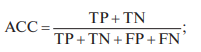

Precision — точность - 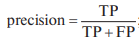

Recall — полнота - 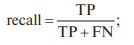

F1-мера - 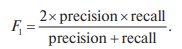

ACC = (5 + 90)/(5 + 90 + 10 + 5) = 95/110 = 0,8

Precision = 5/(5 + 10) = 5/15 = 0,33

Recall = 5/(5 + 5) = 5/10 = 0,5

F1-мера = (2 х 0,33 х 0,5)/(0,33 + 0,5) = 0,33/0,83 = 0,397

Низкая F1-мера (0,397) свидетельствует о том, что модель не очень хорошо сбалансирована в отношении точности и полноты.

**3.Допустим, есть два классификатора: первый классификатор имеет долю правильных ответов 95 %, чувствительность 99 %, 
специфичность 50 %; второй классификатор имеет долю правильных ответов 87 %, чувствительность 84 %, специфичность 
94 %. Что вы можете сказать о данных, используемых для классификации? Какой из этих классификаторов надежнее (при условии, что важно определение обоих классов)?**

Второй классификатор более надёжен, поскольку он имеет сбалансированные показатели чувствительности и специфичности.

**4.Перечислите возможные гиперпараметры модели логистической регрессии**

Обратная сила регуляризации, penalty(определяет тип регуляризации),
solver(алгоритм оптимизации, используемый для обучения модели)

**5.Для набора данных Cars проанализируйте веса моделей при использовании только числовых признаков. Назовите параметр, 
который в наибольшей степени связан с целевой переменной.**

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Загрузка данных
df = pd.read_csv('cars.csv')

# 2. Посмотрите на названия всех колонок
print(df.columns)

# 3. Записываем имя целевой переменной
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Price(euro)'])  
target = df['Price(euro)']

# 4. Разделение данных на признаки и целевую переменную
X = numeric_features
y = target

# 5. Обучение модели
model = LinearRegression()
model.fit(X, y)

# 6. Получение весов модели
weights = pd.Series(model.coef_, index=X.columns)

# 7. Параметр, который наиболее сильно связан с целевой переменной
strongest_feature = weights.abs().idxmax()

print(f"Параметр, который наиболее сильно связан с целевой переменной: {strongest_feature}")

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')
Параметр, который наиболее сильно связан с целевой переменной: Year


**6.Оцените значение функции сигмоиды σ(z) для z = 0.25**

Функции сигмоиды – это вероятность того, что аргумент функции σ(zi) принадлежит одному из классов. Такой аргумент принято 
называть логит. Отметим, что для расчета функции потерь не следует пользоваться округлением до классов

σ(z) = 1 / (1 + exp(-z)) - формула

σ(z) = 1/(1 + exp(-z)) => σ(0,25) = 1/(1+ exp(-0,25)) =  0.562

**7.Оцените значение производной функции сигмоиды σ'(z) для z = –3.**

σ'(z) = σ(z) * (1 - σ(z)) - Формула производной сигмоиды

σ(-3) = 1 / (1 + exp(-(-3))) ≈ 0.047 - находим значение сигмоиды при z = -3

σ'(-3) = 0.047 * (1 - 0.047) ≈ 0.045 - подставляем полученное значение в формулу производной

Производная сигмоиды при z = -3 примерно равна 0.045

**8.Назовите, к какому классу следует отнести результат логистической модели для z = 0.1, если порог равен 0.6**

Поскольку 0.1 (вероятность) меньше 0.6 (порог), то мы относим объект к отрицательному классу.

σ(0.1) = 1 / (1 + exp(-0.1)) = 1 / (1 + 1/ (1.104)) = 1/(1 + 0,906) = 0,525


**9.Оцените значение функции потерь (бинарной кросс-энтропии) для предсказания модели y^ = 0.1 и целевой переменной y = 1.**

L = -[y * log(y^) + (1-y) * log(1-y^)] - Формула бинарной кросс-энтропии

In [8]:
import numpy as np

# Функция бинарной кросс-энтропии
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Дано
y_true = 1  # Целевая переменная
y_pred = 0.1  # Предсказание модели

# Вычисление бинарной кросс-энтропии
loss = binary_cross_entropy(y_true, y_pred)
print(f"Значение бинарной кросс-энтропии: {loss}")


Значение бинарной кросс-энтропии: 2.3025850929940455
